# 💳 Credit Card Fraud Detection

## 📝 Project Description

This project focuses on building machine learning models to **detect fraudulent credit card transactions**. Fraud detection is a challenging task because it's an example of an **imbalanced classification problem** — fraudulent transactions are extremely rare compared to legitimate ones.

We use a real-world dataset containing **284,807 transactions**, with only **492 labeled as fraud**, which is less than **0.2% of the data**. Because of this imbalance, standard machine learning models often fail to detect fraud effectively — they tend to focus on the majority class (non-fraud) and miss the minority class (fraud).

---

## 🎯 Objective

Our goal is to compare different modeling strategies to handle imbalanced data and improve fraud detection performance. We will implement and evaluate the following three approaches:

---

### 1️⃣ Baseline Logistic Regression (on Imbalanced Data)

**In simple terms**:  
Logistic Regression is a model that predicts whether something is true or false — in our case, whether a transaction is fraud or not. It uses the data to draw a line (or boundary) between fraud and non-fraud. But when the dataset is very unbalanced, it becomes biased toward the larger group (non-fraud), so it often misses the smaller group (fraud).

**In technical terms**:  
Logistic Regression models the probability that a transaction belongs to the positive class (fraud) using a logistic (sigmoid) function. It's trained by minimizing a log-loss function. When data is imbalanced, the model minimizes error by focusing more on the majority class, leading to poor recall for fraud detection.

---

### 2️⃣ SMOTE + Logistic Regression

**In simple terms**:  
To help the model learn better, we use a technique called SMOTE (Synthetic Minority Over-sampling Technique). SMOTE creates **fake fraud cases** that look realistic by copying and tweaking existing ones. This balances the dataset, giving the model a better chance to learn what fraud looks like. We then retrain the logistic regression model on this balanced data.

**In technical terms**:  
SMOTE creates synthetic examples of the minority class (fraud) by interpolating between existing nearest neighbors. This helps to balance the class distribution in the training set. Logistic Regression is then applied to this new data, which improves the model’s ability to generalize across both classes and increases recall.

---

### 3️⃣ Isolation Forest (Unsupervised Anomaly Detection)

**In simple terms**:  
Imagine trying to spot something weird in a crowd — that's what this model does. It tries to separate each data point by randomly splitting features. Fraud cases, being rare and different, tend to get isolated faster. So the model marks them as suspicious (anomalies), even without knowing which ones are frauds during training.

**In technical terms**:  
Isolation Forest is an ensemble-based anomaly detection algorithm. It builds random decision trees and uses the number of splits (path length) required to isolate each point as a measure of "normality". Anomalies (like frauds) require fewer splits and thus have shorter path lengths. The algorithm assigns anomaly scores based on this logic.

---

## 📊 Evaluation Metrics

At each stage, we will evaluate models using:

- **Confusion Matrix** – to see how well the model distinguishes fraud from non-fraud  
- **Classification Report** – showing precision, recall, and F1-score  
- **ROC Curve & AUC(Area Under the Curve) Score** – to measure the model's ability to rank frauds correctly

---

## 🧠 Learning Outcomes

By the end of this project, you will:

- Understand how different ML techniques behave on imbalanced data  
- Know when to use oversampling techniques like SMOTE  
- Explore how unsupervised anomaly detection models like Isolation Forest work  
- Learn how to interpret evaluation metrics in the context of fraud detection  
- Recognize the trade-off between **catching more frauds (recall)** and **avoiding false alarms (precision)**


# Model 1: Baseline Logistic Regression (on Imbalanced Data)

## 1. Import libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score


## 2. Load dataset from the web

In [44]:
url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
df = pd.read_csv(url)

## 3. Separate features and target

In [45]:
X = df.drop("Class", axis=1)
y = df["Class"]

## 4. Scale features

In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 5. Train-test split (stratified)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

## 6. Train baseline logistic regression

In [48]:
baseline_model = LogisticRegression(max_iter=1000, random_state=42)
baseline_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

## 7. Predict and evaluate

In [49]:
y_pred = baseline_model.predict(X_test)
y_proba = baseline_model.predict_proba(X_test)[:, 1]

## 8. Confusion Matrix

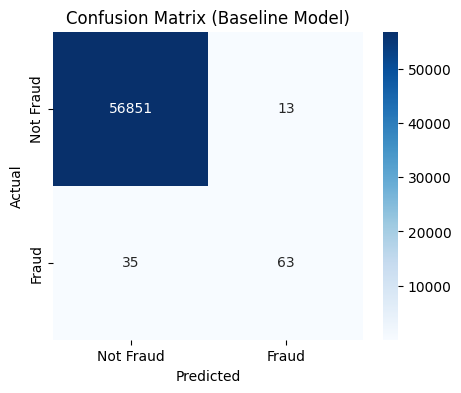

In [50]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.title("Confusion Matrix (Baseline Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 9. Classification Report

In [51]:
print("Classification Report (Baseline Logistic Regression):\n")
print(classification_report(y_test, y_pred, digits=4))

Classification Report (Baseline Logistic Regression):

              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     56864
           1     0.8289    0.6429    0.7241        98

    accuracy                         0.9992     56962
   macro avg     0.9142    0.8213    0.8619     56962
weighted avg     0.9991    0.9992    0.9991     56962



## 10. ROC Curve

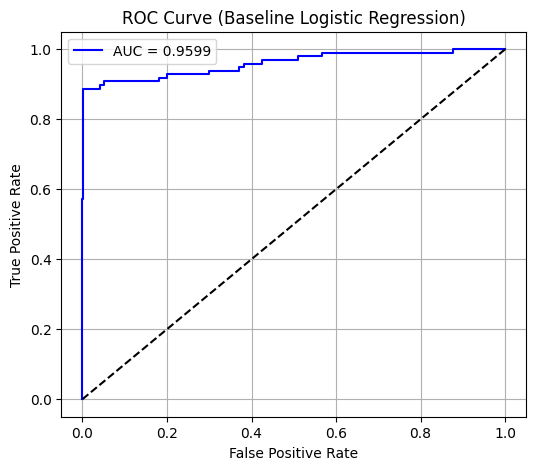

In [52]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}", color="blue")
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve (Baseline Logistic Regression)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


# Model 2: SMOTE + Logistic Regression

## Import SMOTE

In [53]:
from imblearn.over_sampling import SMOTE

## Apply SMOTE to training data

In [54]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

## Train Logistic Regression on SMOTE-balanced data

In [55]:
smote_model = LogisticRegression(max_iter=1000, random_state=42)
smote_model.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000, random_state=42)

## Predict on original test set

In [56]:
y_pred_smote = smote_model.predict(X_test)
y_proba_smote = smote_model.predict_proba(X_test)[:, 1]

## Confusion Matrix

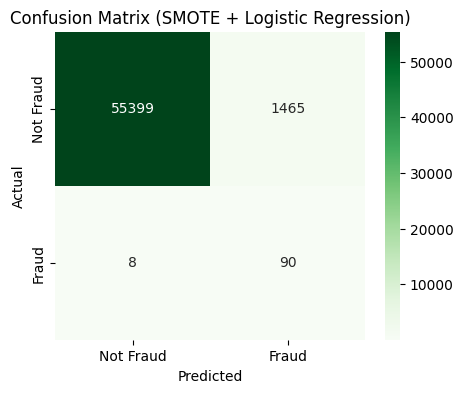

In [57]:
cm_smote = confusion_matrix(y_test, y_pred_smote)
plt.figure(figsize=(5,4))
sns.heatmap(cm_smote, annot=True, fmt="d", cmap="Greens", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.title("Confusion Matrix (SMOTE + Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Classification Report

In [58]:
print("Classification Report (SMOTE + Logistic Regression):\n")
print(classification_report(y_test, y_pred_smote, digits=4))

Classification Report (SMOTE + Logistic Regression):

              precision    recall  f1-score   support

           0     0.9999    0.9742    0.9869     56864
           1     0.0579    0.9184    0.1089        98

    accuracy                         0.9741     56962
   macro avg     0.5289    0.9463    0.5479     56962
weighted avg     0.9982    0.9741    0.9854     56962



## ROC Curve

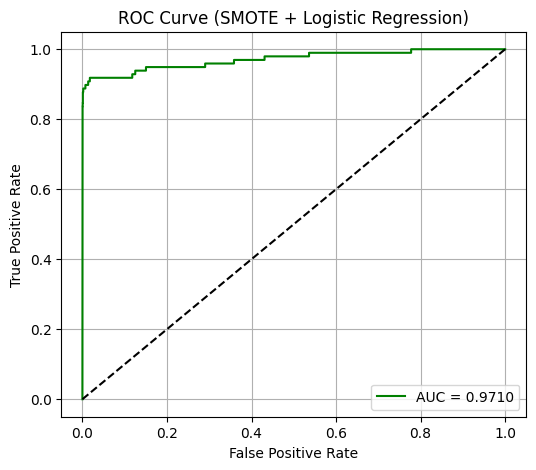

In [59]:
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_proba_smote)
auc_smote = roc_auc_score(y_test, y_proba_smote)

plt.figure(figsize=(6,5))
plt.plot(fpr_smote, tpr_smote, label=f"AUC = {auc_smote:.4f}", color="green")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve (SMOTE + Logistic Regression)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# Model 3: Isolation Forest (Unsupervised Anomaly Detection)

## Import Isolation Forest

In [60]:
from sklearn.ensemble import IsolationForest

## Train Isolation Forest on training data (without labels)

In [61]:
iso_forest = IsolationForest(contamination=len(y_train[y_train==1]) / len(y_train), random_state=42)
iso_forest.fit(X_train)

IsolationForest(contamination=0.001729245759178389, random_state=42)

## Predict anomalies on test set

In [62]:
# IsolationForest labels: -1 for anomaly, 1 for normal
y_pred_iso = iso_forest.predict(X_test)

# Convert to binary: fraud=1 if anomaly (-1), else 0
y_pred_iso = np.where(y_pred_iso == -1, 1, 0)

## Since Isolation Forest does not produce probabilities, we create a score for ROC

In [63]:
scores_iso = -iso_forest.decision_function(X_test)  # Higher scores = more anomalous

## Confusion Matrix

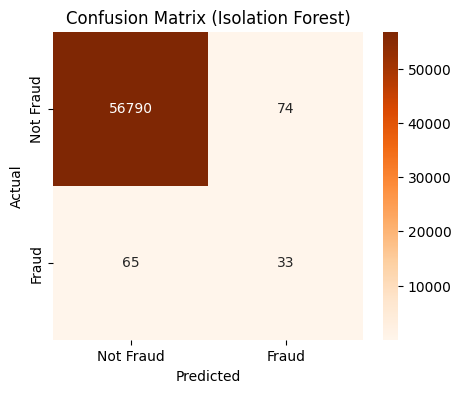

In [64]:
cm_iso = confusion_matrix(y_test, y_pred_iso)
plt.figure(figsize=(5,4))
sns.heatmap(cm_iso, annot=True, fmt="d", cmap="Oranges", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.title("Confusion Matrix (Isolation Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Classification Report

In [65]:
print("Classification Report (Isolation Forest):\n")
print(classification_report(y_test, y_pred_iso, digits=4))

Classification Report (Isolation Forest):

              precision    recall  f1-score   support

           0     0.9989    0.9987    0.9988     56864
           1     0.3084    0.3367    0.3220        98

    accuracy                         0.9976     56962
   macro avg     0.6536    0.6677    0.6604     56962
weighted avg     0.9977    0.9976    0.9976     56962



## ROC Curve

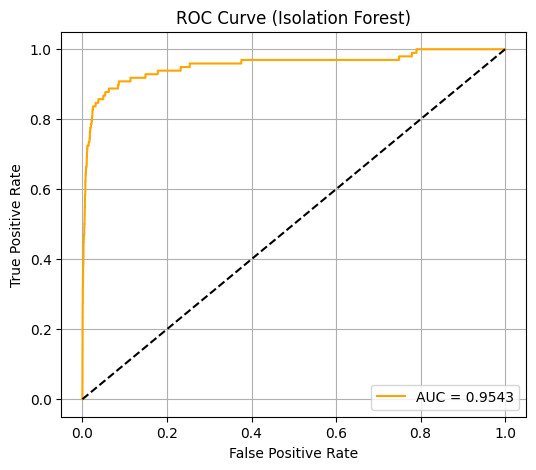

In [66]:
fpr_iso, tpr_iso, _ = roc_curve(y_test, scores_iso)
auc_iso = roc_auc_score(y_test, scores_iso)

plt.figure(figsize=(6,5))
plt.plot(fpr_iso, tpr_iso, label=f"AUC = {auc_iso:.4f}", color="orange")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve (Isolation Forest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# 📊 Comparison of All Three Models

📋 Fraud Class Metrics Comparison:



,precision,recall,f1-score,AUC
Model,,,,
Baseline LR,0.8289,0.6429,0.7241,0.9599
SMOTE + LR,0.0579,0.9184,0.1089,0.9710
Isolation Forest,0.3084,0.3367,0.3220,0.9543


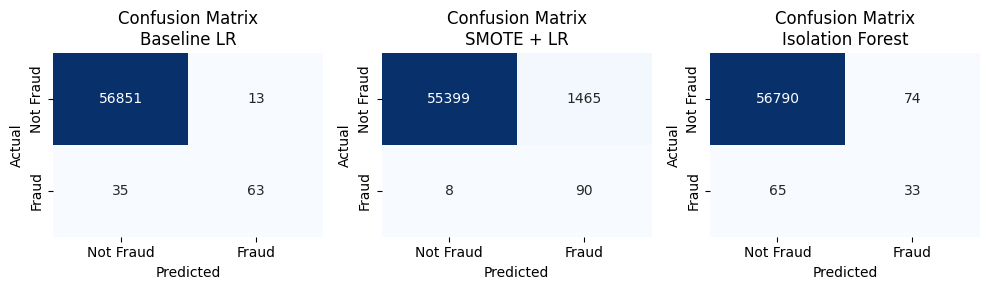

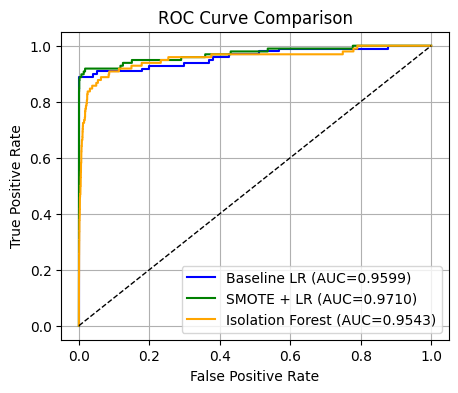

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import numpy as np
import pandas as pd

# Classification reports for fraud class (label 1)
reports = {}
for name, y_pred in zip(
    ["Baseline LR", "SMOTE + LR", "Isolation Forest"],
    [y_pred_base, y_pred_smote, y_pred_iso]
):
    cr = classification_report(y_test, y_pred, output_dict=True)
    reports[name] = cr['1']  # '1' is the fraud class

# Create DataFrame for metrics comparison
metrics_df = pd.DataFrame(reports).T[['precision', 'recall', 'f1-score']]
metrics_df['AUC'] = [auc_base, auc_smote, auc_iso]
metrics_df.index.name = 'Model'

print("📋 Fraud Class Metrics Comparison:\n")
display(metrics_df.style.format({
    'precision': '{:.4f}',
    'recall': '{:.4f}',
    'f1-score': '{:.4f}',
    'AUC': '{:.4f}'
}))
print("\n\n")

# Confusion matrices
cms = {
    "Baseline LR": confusion_matrix(y_test, y_pred_base),
    "SMOTE + LR": confusion_matrix(y_test, y_pred_smote),
    "Isolation Forest": confusion_matrix(y_test, y_pred_iso),
}

# Plot confusion matrices side by side
fig, axes = plt.subplots(1, 3, figsize=(10,3))
for ax, (title, cm) in zip(axes, cms.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=["Not Fraud", "Fraud"],
                yticklabels=["Not Fraud", "Fraud"], ax=ax)
    ax.set_title(f"Confusion Matrix\n{title}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC Curves together
fpr_base, tpr_base, _ = roc_curve(y_test, y_proba_base)
auc_base = roc_auc_score(y_test, y_proba_base)

fpr_smote, tpr_smote, _ = roc_curve(y_test, y_proba_smote)
auc_smote = roc_auc_score(y_test, y_proba_smote)

fpr_iso, tpr_iso, _ = roc_curve(y_test, scores_iso)
auc_iso = roc_auc_score(y_test, scores_iso)

plt.figure(figsize=(5,4))
plt.plot(fpr_base, tpr_base, label=f"Baseline LR (AUC={auc_base:.4f})", color='blue')
plt.plot(fpr_smote, tpr_smote, label=f"SMOTE + LR (AUC={auc_smote:.4f})", color='green')
plt.plot(fpr_iso, tpr_iso, label=f"Isolation Forest (AUC={auc_iso:.4f})", color='orange')
plt.plot([0,1],[0,1],'k--', lw=1, label=)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()

### **Side Note:** (What Does the Black Dotted Line Mean in the ROC Curve?)

The **black dotted diagonal line** in the ROC curve represents the performance of a **random classifier** — one that makes predictions without learning from the data.

This line serves as a **baseline**. It assumes the model randomly guesses the class (fraud or not fraud), resulting in a **50% true positive rate** for a **50% false positive rate**, which gives an **AUC of 0.5**.

- If your model's ROC curve is **above** this line, it means the model is **better than random guessing**.
- The **further above** the curve is, the better your model is at distinguishing fraud from non-fraud.
- A curve **below** this line would mean your model is doing worse than random — possibly predicting in the wrong direction.

In our project, all models perform **above the diagonal line**, meaning they all learn some useful pattern, with varying degrees of effectiveness.
